## Preparación

Este script descarga los datos del repositorio que están en JSON (mongodb), los prepara y limpia en formato csv.

In [ ]:
%pip install python-geohash

/home/roman-arismendi/Workspace/maestria-ia/indexador-py/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import geohash
import requests
import os

In [ ]:
def print_cols(dataset, cols = 5):
    column_list = dataset.columns.to_list()
    start = 0
    end = len(column_list)
    for i in range(start, end, cols):
        x = i
        print(column_list[x:x+cols])

random_state = 42


## Carga de Datos
Los datos han sido descargados desde el repositorio de [apartamentos de Bogota](https://github.com/builker-col/bogota-apartments/tree/master)

In [ ]:
url = "https://github.com/builker-col/bogota-apartments/releases/download/v2.0.0-august.2-2024/raw_v2.0.0_august_2_2024.json"
file_path = "../data/raw_data.json"
if not os.path.exists(file_path):
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    response = requests.get(url)
    with open(file_path, "wb") as f:
        f.write(response.content)

In [ ]:
raw_json_ds = pd.read_json(file_path)
raw_json_ds.head()

,_id,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,...,descripcion,imagenes,website,last_view,datetime,url,timeline,estado,compañia,precio_arriendo
0,{'$oid': '668624b31d799b75dd9ce60d'},4133491,APARTAMENTO,VENTA,339000000,76.0,3.0,2.0,300000,1.0,...,"apartamento en venta de 76m2, con vista exteri...",[https://d3hzflklh28tts.cloudfront.net/venta-a...,habi.co,{'$date': '2024-08-13T10:34:47.315Z'},{'$date': '2024-07-03T23:27:30.843Z'},https://habi.co/page-data/venta-apartamentos/1...,[{'fecha': {'$date': '2024-07-03T23:27:30.843Z...,NaN,NaN,NaN
1,{'$oid': '668624b31d799b75dd9ce60e'},3889852,APARTAMENTO,VENTA,223000000,63.0,3.0,2.0,NaN,0.0,...,"apartamento en venta de 60m2, con vista interi...",[https://d3hzflklh28tts.cloudfront.net/venta-2...,habi.co,{'$date': '2024-09-08T21:28:24.710Z'},{'$date': '2024-07-03T23:27:31.667Z'},https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN
2,{'$oid': '668624b41d799b75dd9ce60f'},4386770,APARTAMENTO,VENTA,440898168,54.0,3.0,2.0,305000,0.0,...,"apartamento en venta de 54m2, con vista exteri...",[https://d3hzflklh28tts.cloudfront.net/venta-9...,habi.co,{'$date': '2024-07-10T18:19:39.749Z'},{'$date': '2024-07-03T23:27:31.886Z'},https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN
3,{'$oid': '668624b41d799b75dd9ce610'},4210060,APARTAMENTO,VENTA,158000000,43.0,2.0,2.0,106600,0.0,...,"apartamento en venta de 43 m2, con vista inter...",[https://d3hzflklh28tts.cloudfront.net/venta-b...,habi.co,{'$date': '2024-07-10T18:19:03.061Z'},{'$date': '2024-07-03T23:27:32.141Z'},https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN
4,{'$oid': '668624b41d799b75dd9ce611'},4063762,APARTAMENTO,VENTA,222800000,48.0,3.0,2.0,151000,0.0,...,"apartamento duplex en venta de 48m2, con vista...",[https://d3hzflklh28tts.cloudfront.net/venta-3...,habi.co,{'$date': '2024-09-08T21:28:24.703Z'},{'$date': '2024-07-03T23:27:32.361Z'},https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN


In [ ]:
raw_json_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44436 entries, 0 to 44435
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   _id              44436 non-null  object 
 1   codigo           44436 non-null  object 
 2   tipo_propiedad   44436 non-null  object 
 3   tipo_operacion   44436 non-null  object 
 4   precio_venta     28741 non-null  object 
 5   area             44436 non-null  float64
 6   habitaciones     44435 non-null  float64
 7   banos            44435 non-null  float64
 8   administracion   36277 non-null  object 
 9   parqueaderos     44435 non-null  float64
 10  sector           41904 non-null  object 
 11  estrato          44434 non-null  float64
 12  antiguedad       44426 non-null  object 
 13  latitud          43519 non-null  float64
 14  longitud         43519 non-null  float64
 15  direccion        817 non-null    object 
 16  caracteristicas  44435 non-null  object 
 17  descripcion 

In [ ]:
raw_json_ds["sector"].head()

0               BRITALIA
1    SAN CRISTOBAL NORTE
2              LA SABANA
3              TIBABUYES
4               VERBENAL
Name: sector, dtype: object

In [ ]:
# Se remueven columnas irrelevantes
dropped_cols = ["_id", "codigo", "datetime", "url", "direccion", "website", 
                "compañia", "timeline", "last_view", "descripcion", "website", "compañia", "imagenes"]
properties = raw_json_ds.drop(dropped_cols, axis=1)

In [ ]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44436 entries, 0 to 44435
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tipo_propiedad   44436 non-null  object 
 1   tipo_operacion   44436 non-null  object 
 2   precio_venta     28741 non-null  object 
 3   area             44436 non-null  float64
 4   habitaciones     44435 non-null  float64
 5   banos            44435 non-null  float64
 6   administracion   36277 non-null  object 
 7   parqueaderos     44435 non-null  float64
 8   sector           41904 non-null  object 
 9   estrato          44434 non-null  float64
 10  antiguedad       44426 non-null  object 
 11  latitud          43519 non-null  float64
 12  longitud         43519 non-null  float64
 13  caracteristicas  44435 non-null  object 
 14  estado           43619 non-null  object 
 15  precio_arriendo  16113 non-null  object 
dtypes: float64(7), object(9)
memory usage: 5.4+ MB


In [ ]:
columns = properties.columns.tolist()

def get_first_property(dictionary: dict, target_type):
    # Si es un dict con una sola clave (caso típico: {'$numberLong': '123456'})
    if isinstance(dictionary, dict) and len(dictionary) == 1:
        value = next(iter(dictionary.values()))
        if value in ("NaN", None):
            return None if target_type == str else -1
        # Si el target_type es int, intenta convertir
        if target_type == int:
            return int(value)
        elif target_type == float:
            return float(value)
        else:
            return str(value)
    # Si no es dict, devuélvelo como está
    return dictionary

def unpack_dict(column_name: str, target_type):
    print(f"✅ Desempaquetando columna: {column_name} al tipo {target_type.__name__}")
    properties[column_name] = properties[column_name].apply(
        lambda v: get_first_property(v, target_type) if isinstance(v, dict) else v
    )
    properties[column_name] = properties[column_name].astype(target_type, errors='ignore')

for column in columns:
    types = properties[column].apply(type).unique()
    if dict in types:
        # si también hay otro tipo, lo detectamos
        other_types = [t for t in types if t != dict]
        target_type = other_types[0] if other_types else str
        unpack_dict(column, target_type)


✅ Desempaquetando columna: precio_venta al tipo int
✅ Desempaquetando columna: administracion al tipo int
✅ Desempaquetando columna: precio_arriendo al tipo float


In [ ]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44436 entries, 0 to 44435
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tipo_propiedad   44436 non-null  object 
 1   tipo_operacion   44436 non-null  object 
 2   precio_venta     28741 non-null  float64
 3   area             44436 non-null  float64
 4   habitaciones     44435 non-null  float64
 5   banos            44435 non-null  float64
 6   administracion   36277 non-null  float64
 7   parqueaderos     44435 non-null  float64
 8   sector           41904 non-null  object 
 9   estrato          44434 non-null  float64
 10  antiguedad       44426 non-null  object 
 11  latitud          43519 non-null  float64
 12  longitud         43519 non-null  float64
 13  caracteristicas  44435 non-null  object 
 14  estado           43619 non-null  object 
 15  precio_arriendo  16113 non-null  float64
dtypes: float64(10), object(6)
memory usage: 5.4+ MB


<Axes: >

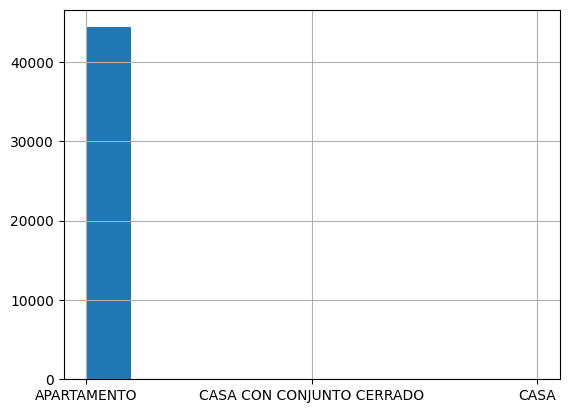

In [ ]:
properties["tipo_propiedad"].hist()

In [ ]:
apartamentos = properties[properties["tipo_propiedad"] == "APARTAMENTO"]
apartamentos.head()

,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,latitud,longitud,caracteristicas,estado,precio_arriendo
0,APARTAMENTO,VENTA,339000000.0,76.0,3.0,2.0,300000.0,1.0,BRITALIA,3.0,ENTRE 10 Y 20 ANOS,4.746592,-74.057571,"[INTERIOR/BLOQUE/TORRE DEL INMUEBLE, BALCON, C...",NaN,NaN
1,APARTAMENTO,VENTA,223000000.0,63.0,3.0,2.0,NaN,0.0,SAN CRISTOBAL NORTE,3.0,MAS DE 20 ANOS,4.730111,-74.028170,"[INSTALACION DE GAS, PORTERIA]",NaN,NaN
2,APARTAMENTO,VENTA,440898168.0,54.0,3.0,2.0,305000.0,0.0,LA SABANA,3.0,ENTRE 0 Y 5 ANOS,4.607378,-74.082648,"[INTERIOR/BLOQUE/TORRE DEL INMUEBLE, BALCON, C...",NaN,NaN
3,APARTAMENTO,VENTA,158000000.0,43.0,2.0,2.0,106600.0,0.0,TIBABUYES,2.0,ENTRE 10 Y 20 ANOS,4.740109,-74.113675,"[INTERIOR/BLOQUE/TORRE DEL INMUEBLE, CONJUNTO ...",NaN,NaN
4,APARTAMENTO,VENTA,222800000.0,48.0,3.0,2.0,151000.0,0.0,VERBENAL,3.0,MAS DE 20 ANOS,4.763900,-74.025280,"[INTERIOR/BLOQUE/TORRE DEL INMUEBLE, CONJUNTO ...",NaN,NaN


<Axes: >

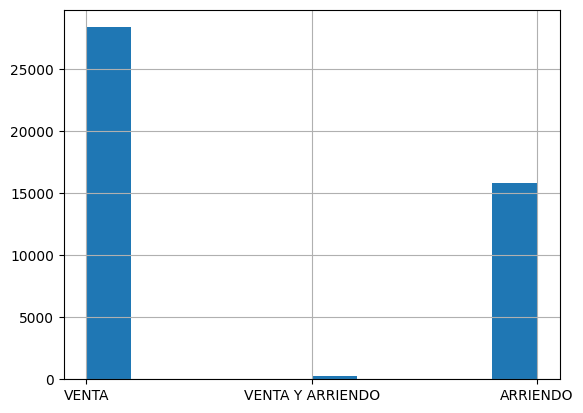

In [ ]:
apartamentos["tipo_operacion"].hist()

In [ ]:
aptos_venta = apartamentos[apartamentos['tipo_operacion'].str.contains('VENTA', case=False, na=False)]
aptos_venta.head()

,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,latitud,longitud,caracteristicas,estado,precio_arriendo
0,APARTAMENTO,VENTA,339000000.0,76.0,3.0,2.0,300000.0,1.0,BRITALIA,3.0,ENTRE 10 Y 20 ANOS,4.746592,-74.057571,"[INTERIOR/BLOQUE/TORRE DEL INMUEBLE, BALCON, C...",NaN,NaN
1,APARTAMENTO,VENTA,223000000.0,63.0,3.0,2.0,NaN,0.0,SAN CRISTOBAL NORTE,3.0,MAS DE 20 ANOS,4.730111,-74.028170,"[INSTALACION DE GAS, PORTERIA]",NaN,NaN
2,APARTAMENTO,VENTA,440898168.0,54.0,3.0,2.0,305000.0,0.0,LA SABANA,3.0,ENTRE 0 Y 5 ANOS,4.607378,-74.082648,"[INTERIOR/BLOQUE/TORRE DEL INMUEBLE, BALCON, C...",NaN,NaN
3,APARTAMENTO,VENTA,158000000.0,43.0,2.0,2.0,106600.0,0.0,TIBABUYES,2.0,ENTRE 10 Y 20 ANOS,4.740109,-74.113675,"[INTERIOR/BLOQUE/TORRE DEL INMUEBLE, CONJUNTO ...",NaN,NaN
4,APARTAMENTO,VENTA,222800000.0,48.0,3.0,2.0,151000.0,0.0,VERBENAL,3.0,MAS DE 20 ANOS,4.763900,-74.025280,"[INTERIOR/BLOQUE/TORRE DEL INMUEBLE, CONJUNTO ...",NaN,NaN


In [ ]:
aptos_venta = aptos_venta.drop(["tipo_operacion", "tipo_propiedad", "precio_arriendo"], axis=1)
print(f"Aptos con precion de venta nullos: {aptos_venta['precio_venta'].isnull().sum()}")
aptos_venta = aptos_venta.dropna(subset=["precio_venta"])
print(f"Aptos con precion de venta nullos: {aptos_venta['precio_venta'].isnull().sum()}")

Aptos con precion de venta nullos: 0
Aptos con precion de venta nullos: 0


In [ ]:
aptos_venta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28578 entries, 0 to 44435
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   precio_venta     28578 non-null  float64
 1   area             28578 non-null  float64
 2   habitaciones     28578 non-null  float64
 3   banos            28578 non-null  float64
 4   administracion   26006 non-null  float64
 5   parqueaderos     28578 non-null  float64
 6   sector           27128 non-null  object 
 7   estrato          28576 non-null  float64
 8   antiguedad       28568 non-null  object 
 9   latitud          27881 non-null  float64
 10  longitud         27881 non-null  float64
 11  caracteristicas  28577 non-null  object 
 12  estado           27835 non-null  object 
dtypes: float64(9), object(4)
memory usage: 3.1+ MB


## Extracción de caracteristicas

La columna caracteristicas contine algunos valores adicionales que pueden ser utiles para el modelo, en esta sección los voy a extraer y analizar a ver si pueden ser de ayuda.

In [ ]:
# Contar nulos o vacíos
nulos_o_vacios = aptos_venta['caracteristicas'].isnull() | (aptos_venta['caracteristicas'].str.strip() == '')

# Conteo
n_nulos_o_vacios = nulos_o_vacios.sum()
n_no_nulos = (~nulos_o_vacios).sum()

print(f"Filas con 'caracteristicas' nulo o vacío: {n_nulos_o_vacios}")
print(f"Filas con 'caracteristicas' NO nulo y NO vacío: {n_no_nulos}")


Filas con 'caracteristicas' nulo o vacío: 1
Filas con 'caracteristicas' NO nulo y NO vacío: 28577


In [ ]:
aptos_venta["caracteristicas"].head()

0    [INTERIOR/BLOQUE/TORRE DEL INMUEBLE, BALCON, C...
1                       [INSTALACION DE GAS, PORTERIA]
2    [INTERIOR/BLOQUE/TORRE DEL INMUEBLE, BALCON, C...
3    [INTERIOR/BLOQUE/TORRE DEL INMUEBLE, CONJUNTO ...
4    [INTERIOR/BLOQUE/TORRE DEL INMUEBLE, CONJUNTO ...
Name: caracteristicas, dtype: object

In [ ]:
import re
import pandas as pd

aptos_venta_caracteristicas = aptos_venta.copy(deep=True)

# Lista con los tags booleanos más comunes que quieres detectar (Asumimos que si no están es porque no se permiten o no tienen)
tags_binarios = [
    'AIRE ACONDICIONADO', 'ALARMA', 'ASCENSOR', 'BALCON', 'CONJUNTO CERRADO', 'SE PERMITEN MASCOTAS',
    'GIMNASIO', 'PISCINA', 'ZONA DE BBQ'
]

# Patrones con valor numérico
patrones_numericos = {
    'area_lote': r'AREA DEL LOTE (\d+\.?\d*)',
    'area_terraza': r'AREA TERRAZA/BALCON (\d+\.?\d*)',
    'numero_piso': r'NUMERO DE PISO (\d+\.?\d*)',
    'numero_closets': r'NUMERO DE CLOSETS (\d+\.?\d*)'
}

# Inicializa las columnas nuevas
for tag in tags_binarios:
    aptos_venta_caracteristicas[tag.replace(" ", "_").lower()] = 0

for col in patrones_numericos.keys():
    aptos_venta_caracteristicas[col] = pd.NA

# Procesa cada fila
for i, row in aptos_venta_caracteristicas.iterrows():
    # Si no es lista (es NaN), usa lista vacía
    if isinstance(row['caracteristicas'], list):
        caracts = [c.upper() for c in row['caracteristicas']]
    else:
        caracts = []
    
    # Marca las booleanas
    for tag in tags_binarios:
        if tag in caracts:
            aptos_venta_caracteristicas.at[i, tag.replace(" ", "_").lower()] = 1
    
    # Extrae los valores numéricos
    for col, pattern in patrones_numericos.items():
        for c in caracts:
            m = re.search(pattern, c)
            if m:
                aptos_venta_caracteristicas.at[i, col] = float(m.group(1))
                break

aptos_venta_caracteristicas.head()


,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,latitud,...,balcon,conjunto_cerrado,se_permiten_mascotas,gimnasio,piscina,zona_de_bbq,area_lote,area_terraza,numero_piso,numero_closets
0,339000000.0,76.0,3.0,2.0,300000.0,1.0,BRITALIA,3.0,ENTRE 10 Y 20 ANOS,4.746592,...,1,1,0,0,0,0,<NA>,<NA>,<NA>,<NA>
1,223000000.0,63.0,3.0,2.0,NaN,0.0,SAN CRISTOBAL NORTE,3.0,MAS DE 20 ANOS,4.730111,...,0,0,0,0,0,0,<NA>,<NA>,<NA>,<NA>
2,440898168.0,54.0,3.0,2.0,305000.0,0.0,LA SABANA,3.0,ENTRE 0 Y 5 ANOS,4.607378,...,1,1,0,0,0,0,<NA>,<NA>,<NA>,<NA>
3,158000000.0,43.0,2.0,2.0,106600.0,0.0,TIBABUYES,2.0,ENTRE 10 Y 20 ANOS,4.740109,...,0,1,0,0,0,0,<NA>,<NA>,<NA>,<NA>
4,222800000.0,48.0,3.0,2.0,151000.0,0.0,VERBENAL,3.0,MAS DE 20 ANOS,4.763900,...,0,1,0,0,0,0,<NA>,<NA>,<NA>,<NA>


In [ ]:
# Vamos a revisar cuantos Nan hay en las caracteristicas adicionales que se agregaron

total = len(aptos_venta_caracteristicas)

for col in ['area_lote', 'area_terraza', 'numero_piso', 'numero_closets']:
    n_nulos = aptos_venta_caracteristicas[col].isna().sum()
    n_validos = total - n_nulos
    print(f"{col}:")
    print(f"  Valores válidos: {n_validos} ({n_validos/total:.1%})")
    print(f"  Valores nulos:   {n_nulos} ({n_nulos/total:.1%})")
    if n_validos > 0:
        print(aptos_venta_caracteristicas[col].describe())
    print("-" * 30)


area_lote:
  Valores válidos: 0 (0.0%)
  Valores nulos:   28578 (100.0%)
------------------------------
area_terraza:
  Valores válidos: 7262 (25.4%)
  Valores nulos:   21316 (74.6%)
count     7262.0
unique     353.0
top          1.0
freq      1486.0
Name: area_terraza, dtype: float64
------------------------------
numero_piso:
  Valores válidos: 19461 (68.1%)
  Valores nulos:   9117 (31.9%)
count     19461.0
unique      122.0
top           2.0
freq       2931.0
Name: numero_piso, dtype: float64
------------------------------
numero_closets:
  Valores válidos: 10433 (36.5%)
  Valores nulos:   18145 (63.5%)
count     10433.0
unique        6.0
top           3.0
freq       3575.0
Name: numero_closets, dtype: float64
------------------------------


## 📋 Conclusión del Análisis de Características Numéricas

Tras analizar la cobertura de las variables numéricas extraídas de la columna `caracteristicas`, se concluye lo siguiente:

- La variable `area_lote` presenta un **100% de valores nulos**, por lo que se decide **eliminarla** del conjunto de datos.
- Las variables `area_terraza`, `numero_piso` y `numero_closets` tienen una cobertura parcial, siendo `numero_piso` la mejor con un **68% de valores válidos**.
- Estas tres variables restantes se conservan en el dataset para una **posible imputación o tratamiento posterior**, dado que podrían contener información útil para el modelo.

Se procederá a eliminar únicamente `area_lote` y mantener las demás para evaluarlas más adelante.


In [ ]:
aptos_venta_caracteristicas = aptos_venta_caracteristicas.drop(columns=['area_lote'])

In [ ]:
print("Balanceo de clases por característica:")
print("-" * 50)

total = len(aptos_venta_caracteristicas)

for tag in tags_binarios:
    col = tag.replace(" ", "_").lower()
    n_1 = aptos_venta_caracteristicas[col].sum()
    n_0 = total - n_1
    pct_1 = n_1 / total * 100
    pct_0 = n_0 / total * 100
    print(f"{col}: 1={n_1} ({pct_1:.1f}%), 0={n_0} ({pct_0:.1f}%)")

Balanceo de clases por característica:
--------------------------------------------------
aire_acondicionado: 1=106 (0.4%), 0=28472 (99.6%)
alarma: 1=1623 (5.7%), 0=26955 (94.3%)
ascensor: 1=18401 (64.4%), 0=10177 (35.6%)
balcon: 1=108 (0.4%), 0=28470 (99.6%)
conjunto_cerrado: 1=12458 (43.6%), 0=16120 (56.4%)
se_permiten_mascotas: 1=557 (1.9%), 0=28021 (98.1%)
gimnasio: 1=9155 (32.0%), 0=19423 (68.0%)
piscina: 1=2995 (10.5%), 0=25583 (89.5%)
zona_de_bbq: 1=7482 (26.2%), 0=21096 (73.8%)


### 📋 Decisiones Finales sobre las Características Binarias

Tras el análisis del balance de clases y la interpretación contextual de cada característica, se toman las siguientes decisiones:

| Característica             | % Presente | Decisión    | Justificación                                                                                    |
| -------------------------- | ---------- | ----------- | ------------------------------------------------------------------------------------------------ |
| **aire\_acondicionado**    | 0.4%       | ❌ Descartar | Muy poco frecuente y con baja relevancia para apartamentos.                                      |
| **balcon**                 | 0.4%       | ❌ Descartar | Muy poco frecuente; probablemente ruido.                                                         |
| **se\_permiten\_mascotas** | 1.9%       | ❌ Descartar | Muy poco frecuente; no aporta información significativa.                                         |
| **ascensor**               | 64.4%      | ✅ Mantener  | Alta frecuencia y esperable; relevante para apartamentos.                                        |
| **conjunto\_cerrado**      | 43.6%      | ✅ Mantener  | Bien balanceada y relevante.                                                                     |
| **gimnasio**               | 32.0%      | ✅ Mantener  | Buena cobertura y relevante para conjuntos residenciales.                                        |
| **zona\_de\_bbq**          | 26.2%      | ✅ Mantener  | Suficiente cobertura y valor agregado para el conjunto.                                          |
| **piscina**                | 10.5%      | ✅ Mantener  | Aunque poco frecuente, es un elemento relevante en conjuntos residenciales.                      |
| **alarma**                 | 5.7%       | ✅ Mantener  | Aunque poco frecuente y con posible ambigüedad, se retiene para evaluar relevancia en el modelo. |

---

#### 📌 Comentarios adicionales

* Se opta por **mantener `piscina`**, ya que, pese a su baja frecuencia, es un factor distintivo y de alto impacto en conjuntos residenciales.
* Se decide mantener **`alarma`**, aunque es poco clara en su significado (puede referirse a una alarma dentro del apartamento o del conjunto). La relevancia de esta característica se evaluará durante la construcción del modelo.

Las características descartadas (`aire_acondicionado`, `balcon`, `se_permiten_mascotas`) tienen una frecuencia extremadamente baja y se consideran poco útiles para el análisis o el modelo predictivo.


In [ ]:
# Lista completa original
tags_binarios = [
    'AIRE ACONDICIONADO', 'ALARMA', 'ASCENSOR', 'BALCON', 'CONJUNTO CERRADO', 
    'SE PERMITEN MASCOTAS', 'GIMNASIO', 'PISCINA', 'ZONA DE BBQ'
]

# Características que decidimos mantener
tags_binarios_mantener = [
    'ALARMA', 'ASCENSOR', 'CONJUNTO CERRADO', 'GIMNASIO', 'PISCINA', 'ZONA DE BBQ'
]

# Columnas que se quedan en el DataFrame (en minúsculas con _)
cols_mantener = [tag.replace(" ", "_").lower() for tag in tags_binarios_mantener]

# Columnas que se descartan (también con _)
cols_descartar = [tag.replace(" ", "_").lower() for tag in tags_binarios if tag not in tags_binarios_mantener]

# Eliminamos las no deseadas
aptos_venta_caracteristicas.drop(columns=cols_descartar, inplace=True)

print("Características eliminadas:", cols_descartar)
print("Características mantenidas:", cols_mantener)


Características eliminadas: ['aire_acondicionado', 'balcon', 'se_permiten_mascotas']
Características mantenidas: ['alarma', 'ascensor', 'conjunto_cerrado', 'gimnasio', 'piscina', 'zona_de_bbq']


In [ ]:
# Eliminar la columna 'caracteristicas' porque ya fue procesada
if 'caracteristicas' in aptos_venta_caracteristicas.columns:
    aptos_venta_caracteristicas.drop(columns=['caracteristicas'], inplace=True)

print("✅ Columna 'caracteristicas' eliminada.")


✅ Columna 'caracteristicas' eliminada.


In [ ]:
aptos_venta_caracteristicas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28578 entries, 0 to 44435
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   precio_venta      28578 non-null  float64
 1   area              28578 non-null  float64
 2   habitaciones      28578 non-null  float64
 3   banos             28578 non-null  float64
 4   administracion    26006 non-null  float64
 5   parqueaderos      28578 non-null  float64
 6   sector            27128 non-null  object 
 7   estrato           28576 non-null  float64
 8   antiguedad        28568 non-null  object 
 9   latitud           27881 non-null  float64
 10  longitud          27881 non-null  float64
 11  estado            27835 non-null  object 
 12  alarma            28578 non-null  int64  
 13  ascensor          28578 non-null  int64  
 14  conjunto_cerrado  28578 non-null  int64  
 15  gimnasio          28578 non-null  int64  
 16  piscina           28578 non-null  int64  
 17

In [ ]:
cols_enteros = ["area", "precio_venta", "habitaciones", "banos", "administracion", 
                "parqueaderos", "estrato", "area_terraza", "numero_piso", "numero_closets"]

print(f"Columnas candidatas a int: {cols_enteros}")
print("-" * 50)

# revisar NaNs
for col in cols_enteros:
    n_nulos = aptos_venta_caracteristicas[col].isna().sum()
    n_total = len(aptos_venta_caracteristicas)
    if n_nulos > 0:
        print(f"{col}: {n_nulos} NaN ({n_nulos/n_total:.1%})")
    else:
        print(f"{col}: sin NaN")

Columnas candidatas a int: ['area', 'precio_venta', 'habitaciones', 'banos', 'administracion', 'parqueaderos', 'estrato', 'area_terraza', 'numero_piso', 'numero_closets']
--------------------------------------------------
area: sin NaN
precio_venta: sin NaN
habitaciones: sin NaN
banos: sin NaN
administracion: 2572 NaN (9.0%)
parqueaderos: sin NaN
estrato: 2 NaN (0.0%)
area_terraza: 21316 NaN (74.6%)
numero_piso: 9117 NaN (31.9%)
numero_closets: 18145 NaN (63.5%)


In [ ]:
aptos_venta_caracteristicas.to_csv("../data/aptos_bogota.csv", index=False, encoding='utf-8')

In [ ]:
aptos_sample = aptos_venta_caracteristicas.sample(n=100, random_state=42)

# Exportar el sample
aptos_sample.to_csv("../data/aptos_bogota_sample.csv", index=False)